In [4]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
TRAINING_DATA = "train.csv"

In [6]:
def load_training_data(date, filename=TRAINING_DATA):
    """
    Load training data from the one of the data/date folders.

    :parameter date (string): The date folder name.  Ex: "2020-02-04"
    :parameter filename (string): The csv filename.
    :returns a pandas dataframe.
    """

    basepath = os.path.abspath('')
    filepath = os.path.abspath(os.path.join(basepath, "..", "..")) + "/data/" + date + "/" + filename
    return pd.read_csv(filepath)

In [7]:
data = load_training_data("2020-04-04")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
           ..
349254      1
240929      1
36864       1
347061      1
PC 17759    1
Name: Ticket, Length: 681, dtype: int64

In [11]:
data['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
F33            3
              ..
E63            1
B86            1
C47            1
E46            1
F E69          1
Name: Cabin, Length: 147, dtype: int64

In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


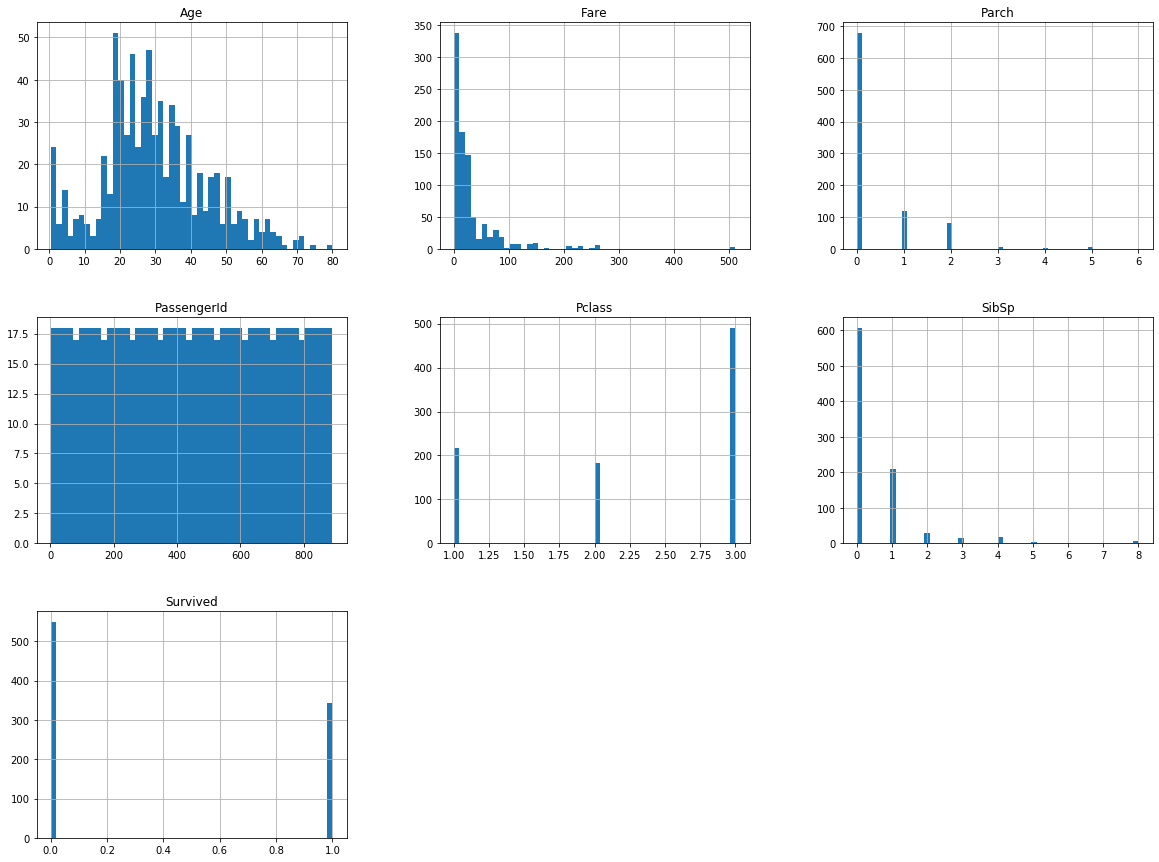

In [14]:
data.hist(bins=50, figsize=(20,15))
plt.savefig('temp__Histogram', format='svg')

## Looking for Correlations

In [46]:
corr_matrix = data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived         1.000000
Fare             0.257307
Parch            0.081629
FamilyMembers    0.016639
PassengerId     -0.005007
SibSp           -0.035322
Age             -0.077221
Pclass          -0.338481
Name: Survived, dtype: float64

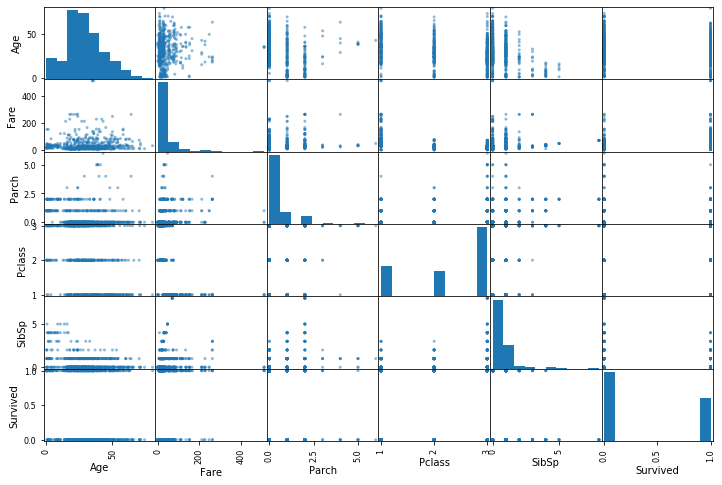

In [15]:
attributes = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived']
pd.plotting.scatter_matrix(data[attributes], figsize=(12,8))
plt.savefig('temp__CorrMatrix', format='png')

## Experimenting with Attribute Combinations

In [31]:
data['FamilyMembers'] = data['SibSp'] + data['Parch']
corr_matrix = data.corr()
corr_matrix['Survived']

PassengerId     -0.005007
Survived         1.000000
Pclass          -0.338481
Age             -0.077221
SibSp           -0.035322
Parch            0.081629
Fare             0.257307
FamilyMembers    0.016639
Name: Survived, dtype: float64